In [17]:
import numpy as np
import pandas as pd
from scipy import linalg as la
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. PCA on 3D dataset

Generate a dataset with 3 features each with N entries (N being 
). With 
 the normal distribution with mean 
 and 
 standard deviation, generate the 3 variables 
 such that:
 is distributed as 
 is distributed as 
 is given by 
Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
Redefine the data in the basis yielded by the PCA procedure
Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) projections.

In [53]:
N = 2000
mu = [0, 0]
sigma = [1, 3]
X = np.zeros((3, N))
X[0] = np.random.normal(loc=mu[0], scale=sigma[0], size=N)
X[1] = X[0] + np.random.normal(loc=mu[1], scale=sigma[1], size=N)
X[2] = 2*X[0]+X[1]

In [54]:
# we build the covariance matrix
cov = np.cov(X)
# we find eigenvalues and eigenvectors
l, V = la.eig(cov)
l = np.real(l)
#order eigen values and vectors
l[::-1].sort()
V = V[:,[0,2,1]]

print("Eigenvalues are \n", l)
print("Eigenvectors are \n", V)

Eigenvalues are 
 [2.73401263e+01 1.96447156e+00 4.84261038e-16]
Eigenvectors are 
 [[-0.11237083  0.56630922 -0.81649658]
 [-0.58121348 -0.70393482 -0.40824829]
 [-0.80595514  0.42868362  0.40824829]]


In [57]:
# SVD
U, spectrum, Vt = la.svd(X)
print("Shapes:", U.shape, spectrum.shape, Vt.shape)
print ("Spectrum:\n", spectrum, '\n')
print("Eigenvalues of Cov:", spectrum**2/(N-1))
print("U:\n", U)
#print("\nVt:\n", Vt, "\n")

#print(cov)
#print(np.dot(U, np.dot(np.diag(np.real_if_close(spectrum)), Vt)),'\n')

print("Are eigenvalues equal? ", np.allclose(l, spectrum**2/(N-1), rtol=1e-3))
print("Are eigenvectors equal?", np.allclose(V, U, rtol=1e-3))

Shapes: (3, 3) (3,) (2000, 2000)
Spectrum:
 [2.33831628e+02 6.26656832e+01 1.14715972e-13] 

Eigenvalues of Cov: [2.73522913e+01 1.96447616e+00 6.58316868e-30]
U:
 [[-0.11236556  0.56631026 -0.81649658]
 [-0.58122004 -0.7039294  -0.40824829]
 [-0.80595115  0.42869113  0.40824829]]
Are eigenvalues equal?  True
Are eigenvectors equal? True


In [85]:
Tr = np.sum(l)
var = [ev/Tr*100 for ev  in l]
print("The variablilty ratios associated to each eigenvalue are:")
for v, ev in zip(var, l):
    print(f"{ev}:  {v}%")
print(f"For  total of: {np.sum(var)}%")

print("To reduce the dimensionality of the system so that at least 99% of the total variability is retained we just need the first two components")
print(var[0]+var[1], "%")

The variablilty ratios associated to each eigenvalue are:
27.34012632778375:  93.29637085557681%
1.9644715649964342:  6.703629144423183%
4.842610375863297e-16:  1.6525087269859375e-15%
For  total of: 100.0%
To reduce the dimensionality of the system so that at least 99% of the total variability is retained we just need the first two components
100.0 %
[[ 0.97524742  1.00249674  2.95299158]
 [ 1.00249674 10.20918692 12.2141804 ]
 [ 2.95299158 12.2141804  18.12016356]]


27.34012632778375 [-0.11237083 -0.58121348 -0.80595514]
1.9644715649964342 [ 0.56630922 -0.70393482  0.42868362]
4.842610375863297e-16 [-0.81649658 -0.40824829  0.40824829]
27.34012632778375 [1 0 0]
1.9644715649964342 [0 1 0]
4.842610375863297e-16 [0 0 1]


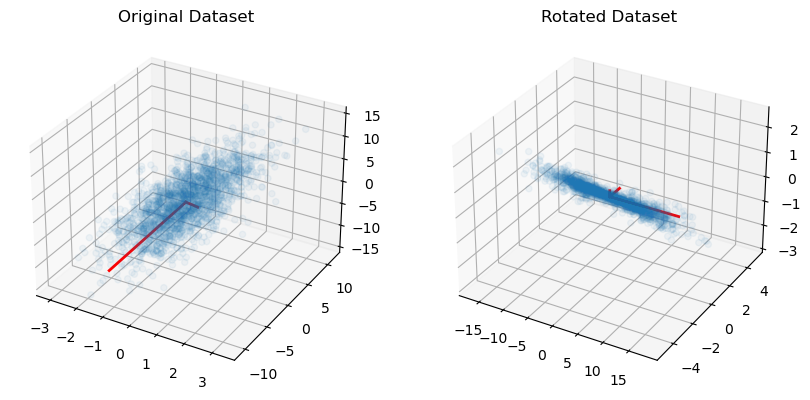

In [91]:
#define the dataset in the new base
Xr = np.dot(V.T, X)

fig = plt.figure(figsize=(10,10))

#AX1 : original dataset
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[0,:], X[1,:], X[2,:], alpha=0.05)
# a scale factor to emphazise the lines 
scale_factor=0.5
ax1.set_title("Original Dataset")
# draw each eigenvector
for ev, v in zip(l, V.T):
    print(ev, v)
    # the line is defined by means of its beginning and its end 
    ax1.plot([0, scale_factor*ev*v[0]], [0, scale_factor*ev*v[1]], [0, scale_factor*ev*v[2]], 'r-', lw=2)

#AX2 : dataset in PCA basis
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(Xr[0,:], Xr[1,:], Xr[2,:], alpha=0.05)
# a scale factor to emphazise the lines 
scale_factor=0.5
ax2.set_title("Rotated Dataset")
# draw each eigenvector
for ev, v in zip(l, np.diag([1]*3)):
    print(ev, v)
    # the line is defined by means of its beginning and its end 
    ax2.plot([0, scale_factor*ev*v[0]], [0, scale_factor*ev*v[1]], [0, scale_factor*ev*v[2]], 'r-', lw=2)
    
plt.show()

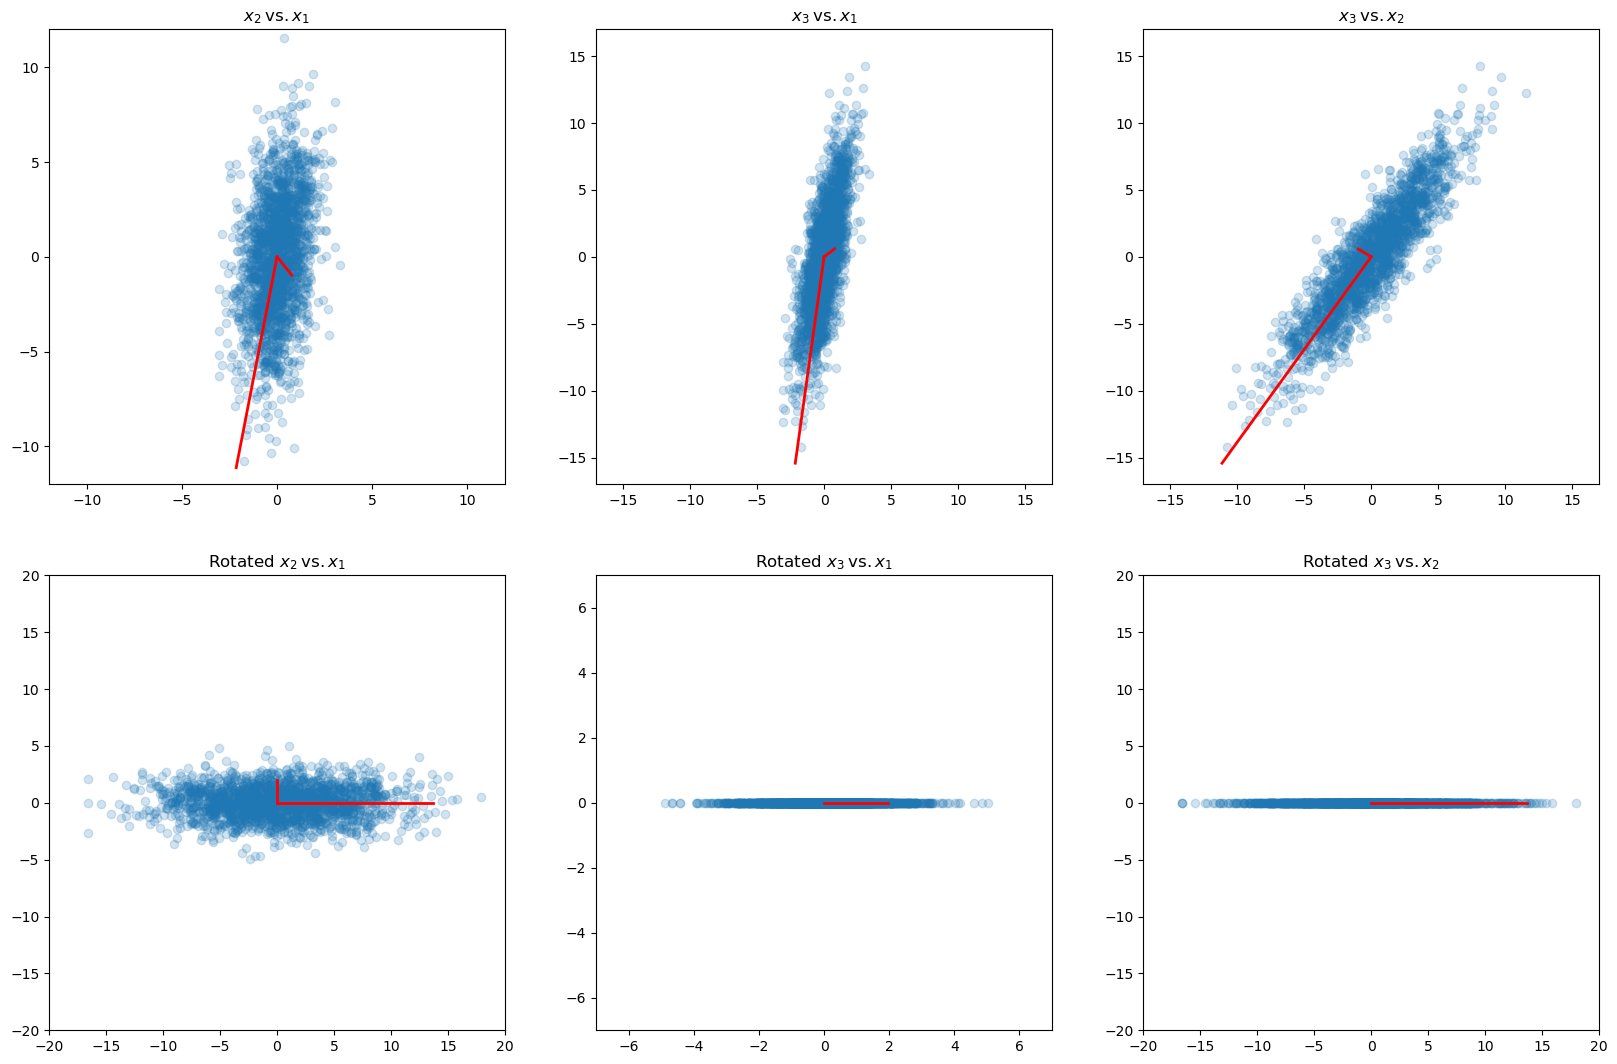

In [92]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20, 13))

scale_factor = 0.7

ax1.scatter(X[0,:], X[1,:], alpha=0.2)
for ev, v in zip(l, V.T):
    ax1.plot([0, scale_factor*ev*v[0]], [0, scale_factor*ev*v[1]], 'r-', lw=2)
ax1.axis([-12,12,-12,12])
ax1.set_title(r'$x_2\:\mathrm{vs.}x_1$')

ax2.scatter(X[0,:], X[2,:], alpha=0.2)
for ev, v in zip(l, V.T):
    ax2.plot([0, scale_factor*ev*v[0]], [0, scale_factor*ev*v[2]], 'r-', lw=2)    
ax2.axis([-17,17,-17,17])
ax2.set_title(r'$x_3\:\mathrm{vs.}x_1$')

ax3.scatter(X[1,:], X[2,:], alpha=0.2)
for ev, v in zip(l, V.T):
    ax3.plot([0, scale_factor*ev*v[1]], [0, scale_factor*ev*v[2]], 'r-', lw=2)    
ax3.axis([-17,17,-17,17])
ax3.set_title(r'$x_3\:\mathrm{vs.}x_2$')

#rotated dataset

ax4.scatter(Xr[0,:], Xr[1,:], alpha=0.2)
for ev, v in zip(l, np.diag([1]*3)):
    ax4.plot([0, 0.5*ev*v[0]], [0, ev*v[1]], 'r-', lw=2)
ax4.axis([-20,20,-20,20])
ax4.set_title(r'Rotated $x_2\:\mathrm{vs.}x_1$')

ax5.scatter(Xr[1,:], Xr[2,:], alpha=0.2)
for ev, v in zip(l, np.diag([1]*3)):
    ax5.plot([0, ev*v[1]], [0, ev*v[2]], 'r-', lw=2)
ax5.axis([-7,7,-7,7])
ax5.set_title(r'Rotated $x_3\:\mathrm{vs.}x_1$')

ax6.scatter(Xr[0,:], Xr[2,:], alpha=0.2)
for ev, v in zip(l, np.diag([1]*3)):
    ax6.plot([0, 0.5*ev*v[0]], [0, scale_factor*ev*v[2]], 'r-', lw=2)
ax6.axis([-20,20,-20,20])
ax6.set_title(r'Rotated $x_3\:\mathrm{vs.}x_2$')

plt.subplots_adjust(wspace = 0.2)
plt.show()

3 . Looking at an oscillating spring (optional)

Imagine you have 
 cameras looking at a spring oscillating along the 
 axis. Each camera record the motion of the spring looking at it along a given direction defined by the pair 
, the angles in spherical coordinates.

Start from the simulation of the records (say 
) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the 
. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.

In [101]:
n = 5 # number of cameras
N = 2000 # number of records

data = np.zeros((3, N)) # x and y data
time = np.linspace(0, 100, N)
data[0] = (lambda x: np.cos(2*np.pi*x))(time)
data[1] = np.random.normal(loc=0, scale=1./2, size=N)

# For each camera we randomly select a pair (theta, phi)
theta = np.random.random(n)*np.pi
phi = np.random.random(n)*2*np.pi

# We rotate such dataset

Xp = np.zeros((n, N))
for i in range(n):
    Rz = np.array([[np.cos(phi[i]), -np.sin(phi[i]), 0],
                   [np.sin(phi[i]),  np.cos(phi[i]), 0],
                   [0,               0,              1]])
    Ry = np.array([[ np.cos(theta[i]), 0, np.sin(theta[i])],
                   [ 0,                1,                0],
                   [-np.sin(theta[i]), 0, np.cos(theta[i])]])
    # rotation matrix 2D
    Xp[i] = data[0]*np.cos(phi[i])*np.cos(theta[i]) - data[1]*np.sin(-phi[i])*np.cos(theta[i])     

Xp.shape
# We now perform PCA

(5, 2000)

In [102]:
# PCA
U, spectrum, Vt = la.svd(Xp)
# spectrum = np.array([spectrum[0], spectrum[2], spectrum[1]])
# U = U[:, [0, 2, 1]]
print("shapes:", U.shape, spectrum.shape, Vt.shape)
print (spectrum**2/(N-1), '\n')
print (U, '\n')
# print (Vt, '\n')

shapes: (5, 5) (5,) (2000, 2000)
[8.54142534e-01 6.42494414e-02 1.26512697e-31 1.86158797e-32
 5.04683347e-34] 

[[-1.56042450e-01 -4.16654253e-01  4.17418997e-01  2.32316289e-01
   7.57522614e-01]
 [ 1.04899486e-01 -5.10675359e-01  6.10723885e-01  6.61513704e-04
  -5.96005599e-01]
 [ 1.42768997e-01 -1.36510229e-01 -2.98737341e-01  9.19330671e-01
  -1.63000272e-01]
 [-7.22845255e-01 -5.00401632e-01 -4.35301375e-01 -1.29148649e-01
  -1.44659199e-01]
 [ 6.49429444e-01 -5.44585232e-01 -4.17188725e-01 -2.90138670e-01
   1.53105986e-01]] 



In [103]:
lambda_trace = np.sum(spectrum**2/(N-1))
new = 0
k = 0
for eig in spectrum**2/(N-1):
    print(eig/lambda_trace)
    if new >= 0.99:
        break
    else:
        new += eig/lambda_trace
        k += 1
print(f"We have reached a variability of {new*100}% with dimensionality k = {k}")
print(f"As expected we get k = {k}, so only one component is sufficient to study our spring")
print(f"Is fun to see that if we raise the scale factor that defines the data along the y axes, k raises too, becoming k = 2")

0.9300413733047804
0.06995862669521956
1.377545757796979e-31
We have reached a variability of 100.0% with dimensionality k = 2
As expected we get k = 2, so only one component is sufficient to study our spring
Is fun to see that if we raise the scale factor that defines the data along the y axes, k raises too, becoming k = 2
